In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



coffee_data=pd.read_csv('/content/index.csv')
coffee_data.head(20)

coffee_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


##1. Cleaning  and Handling the Data

In [ ]:
coffee_data.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,89
money,0
coffee_name,0


In [ ]:
df=coffee_data  #duplicate the dataset
df.head(20)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert datetime and date
df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")
df["date"] = pd.to_datetime(df["date"], errors="coerce").dt.date

# Convert money to numeric
df["money"] = pd.to_numeric(df["money"], errors="coerce")

# Handle missing values
df["card"] = df["card"].fillna("CASH") #Filling Cash for the  cash customers

#Normalize coffee name
df["coffee_name"]=df["coffee_name"].str.title()

# Normalize payment method
df["payment_method"] = df["cash_type"].str.lower().str.strip()

# Feature engineering
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.day
df["hour"] = df["datetime"].dt.hour
df["weekday"] = df["datetime"].dt.weekday
df["weekday_name"] = df["datetime"].dt.day_name()
df["is_weekend"] = df["weekday"].isin([5, 6])


# Outlier detection (IQR rule on money)
Q1 = df["money"].quantile(0.25)
Q3 = df["money"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[(df["money"] >= lower) & (df["money"] <= upper)]

# Save cleaned dataset
df.to_csv("cleaned_Coffee_data.csv", index=False)
print("Step 1 complete. Cleaned data saved as cleaned_index.csv")

Step 1 complete. Cleaned data saved as cleaned_index.csv


In [ ]:
df.head(50)

,date,datetime,cash_type,card,money,coffee_name,payment_method,year,month,day,hour,weekday,weekday_name,is_weekend
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,card,2024,3,1,10,4,Friday,False
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,card,2024,3,1,12,4,Friday,False
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,card,2024,3,1,12,4,Friday,False
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,card,2024,3,1,13,4,Friday,False
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,card,2024,3,1,13,4,Friday,False
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano With Milk,card,2024,3,1,15,4,Friday,False
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate,card,2024,3,1,16,4,Friday,False
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano With Milk,card,2024,3,1,18,4,Friday,False
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa,card,2024,3,1,19,4,Friday,False
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano With Milk,card,2024,3,1,19,4,Friday,False


In [ ]:
df.describe()

,datetime,money,year,month,day,hour,weekday
count,1133,1133.000000,1133.0,1133.000000,1133.000000,1133.000000,1133.000000
mean,2024-05-20 02:38:39.053382912,33.105808,2024.0,5.082083,16.793469,14.552515,2.943513
min,2024-03-01 10:15:50.520000,18.120000,2024.0,3.000000,1.000000,7.000000,0.000000
25%,2024-04-14 10:55:27.406000128,28.900000,2024.0,4.000000,9.000000,11.000000,1.000000
50%,2024-05-23 12:22:06.604999936,32.820000,2024.0,5.000000,18.000000,14.000000,3.000000
75%,2024-06-22 08:39:50.272999936,37.720000,2024.0,6.000000,25.000000,18.000000,5.000000
max,2024-07-31 21:55:16.570000,40.000000,2024.0,7.000000,31.000000,22.000000,6.000000
std,NaN,5.035366,0.0,1.390073,8.921907,4.084588,1.971167


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1133 non-null   object        
 1   datetime        1133 non-null   datetime64[ns]
 2   cash_type       1133 non-null   object        
 3   card            1133 non-null   object        
 4   money           1133 non-null   float64       
 5   coffee_name     1133 non-null   object        
 6   payment_method  1133 non-null   object        
 7   year            1133 non-null   int32         
 8   month           1133 non-null   int32         
 9   day             1133 non-null   int32         
 10  hour            1133 non-null   int32         
 11  weekday         1133 non-null   int32         
 12  weekday_name    1133 non-null   object        
 13  is_weekend      1133 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int32(5), obj

In [ ]:
df.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,0
money,0
coffee_name,0
payment_method,0
year,0
month,0
day,0


##2.Exploratory Data Analysis (EDA)

In [ ]:
df=pd.read_csv("/content/cleaned_Coffee_data.csv",parse_dates=["datetime"])


coffee_name
Americano With Milk    268
Latte                  243
Cappuccino             196
Americano              169
Cortado                 99
Hot Chocolate           74
Espresso                49
Cocoa                   35
Name: count, dtype: int64


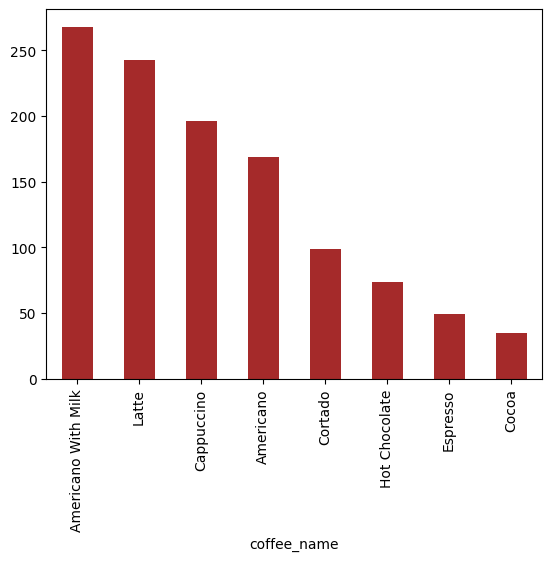

In [ ]:
#Coffee by popuarity
print(df["coffee_name"].value_counts().head(20))
#plotting the graph
df["coffee_name"].value_counts().head(20).plot(kind="bar",color="brown")
plt.show()

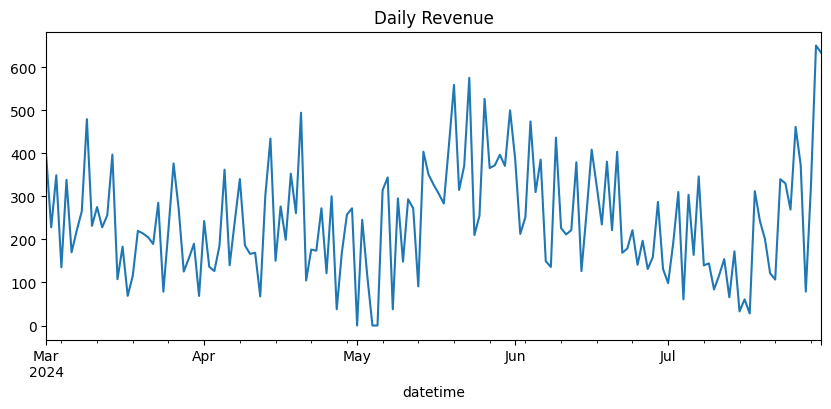

In [ ]:
#Daily Revenue
daily = df.set_index("datetime").resample("D")["money"].sum()
daily.plot(figsize=(10,4), title="Daily Revenue")
plt.show()

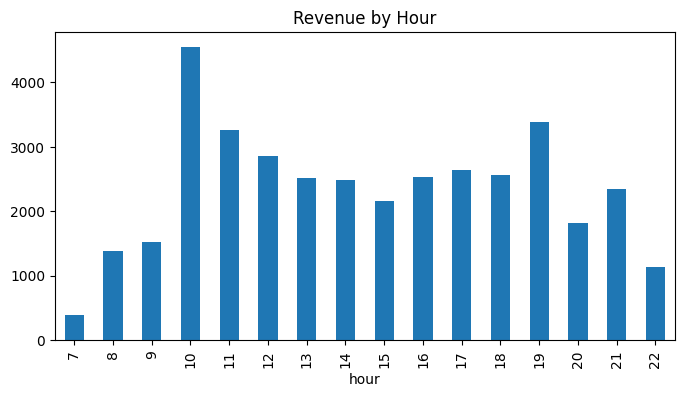

In [ ]:
#Hourly revenue
hourly = df.groupby("hour")["money"].sum()
hourly.plot(kind="bar", figsize=(8,4), title="Revenue by Hour")
plt.show()

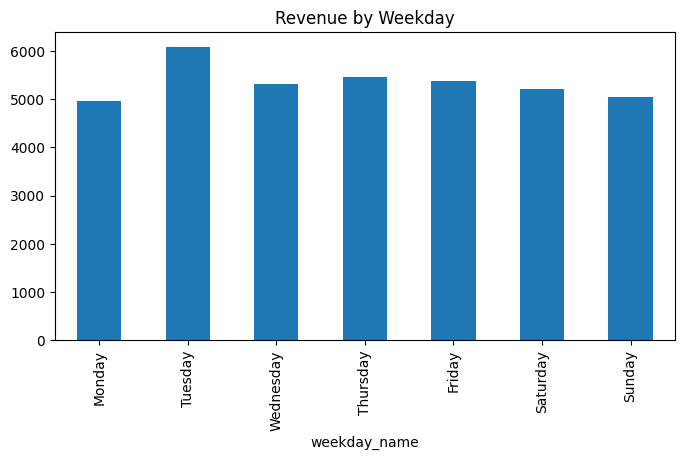

In [ ]:
#Weekday revenue
weekday = df.groupby("weekday_name")["money"].sum()
weekday = weekday.reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
weekday.plot(kind="bar", figsize=(8,4), title="Revenue by Weekday")
plt.show()

##3.Machine learning Model

In [ ]:
# Step 3: Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Features and target
X = df[["hour","weekday","is_weekend","coffee_name"]]
y = df["money"]


# One-hot encode coffee_name
ohe = OneHotEncoder(handle_unknown="ignore")
X_encoded = ohe.fit_transform(X[["coffee_name"]])
coffee_cols = [f"coffee_{c}" for c in ohe.categories_[0]]
X_num = X[["hour","weekday","is_weekend"]].astype(float).reset_index(drop=True)
X_final = pd.concat([X_num, pd.DataFrame(X_encoded.toarray(), columns=coffee_cols)], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

MAE=mean_absolute_error(y_test, y_pred)
RMSE=np.sqrt(mean_squared_error(y_test, y_pred))
R2=r2_score(y_test, y_pred)
# Evaluation
print("MAE:",MAE)
print("RMSE:", RMSE)
print("R2 Score:",R2)

MAE: 1.4249234850496644
RMSE: 1.9957347825397278
R2 Score: 0.7860519834534714


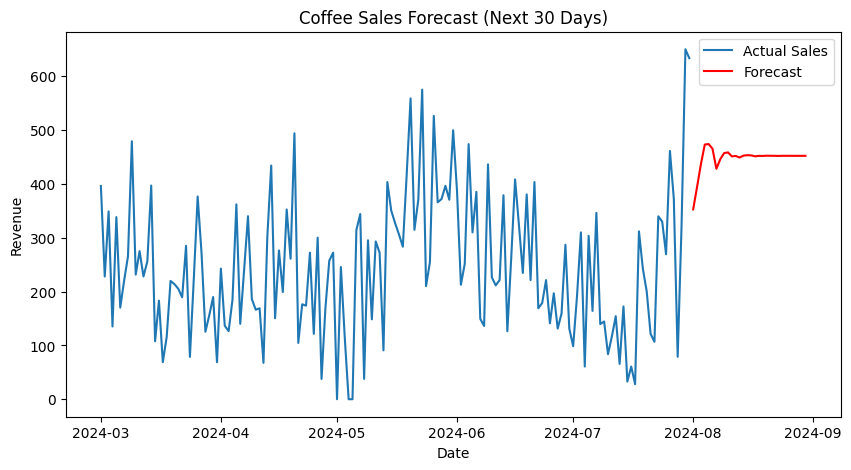

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Use daily revenue data
daily = df.set_index("datetime").resample("D")["money"].sum()

# Train ARIMA model
model = ARIMA(daily, order=(5,1,0))   # (p,d,q) parameters
model_fit = model.fit()

# Forecast next 30 days
forecast = model_fit.forecast(steps=30)

# Plot actual vs forecast
plt.figure(figsize=(10,5))
plt.plot(daily, label="Actual Sales")
plt.plot(forecast.index, forecast, label="Forecast", color="red")
plt.title("Coffee Sales Forecast (Next 30 Days)")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.show()


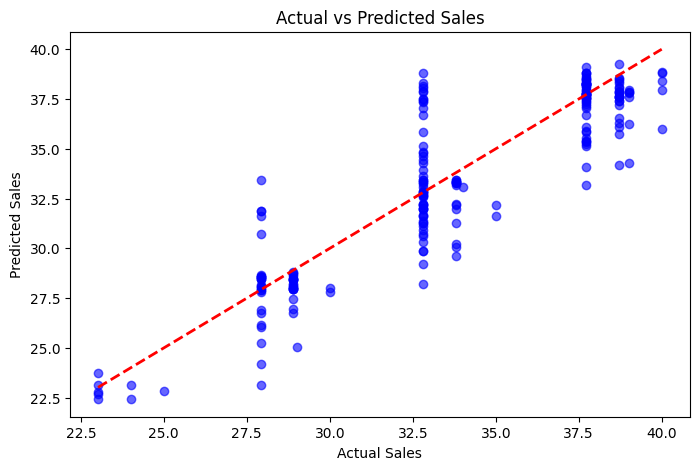

In [ ]:


# y_test and y_pred are from your ML regression
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--", lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


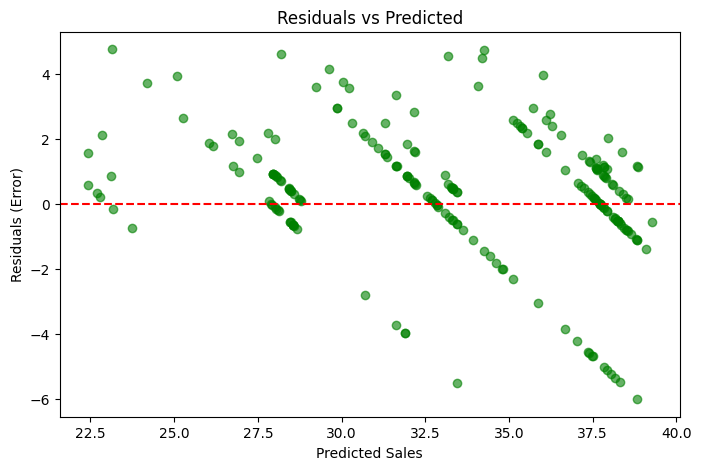

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.6, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals (Error)")
plt.title("Residuals vs Predicted")
plt.show()


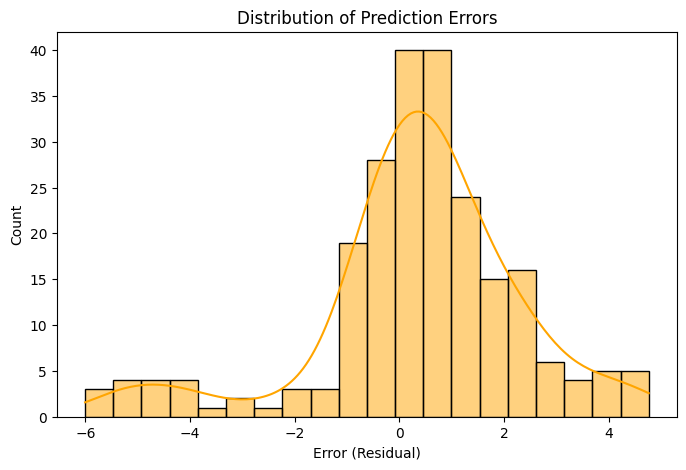

In [ ]:


plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=20, kde=True, color="orange")
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Residual)")
plt.show()


In [ ]:
# Calculate residuals
residuals = y_test - y_pred

print("🔹 Conclusion & Insights 🔹\n")

# Model performance
print(f"✅ Mean Absolute Error (MAE): {MAE:.2f}")
print(f"✅ Root Mean Squared Error (RMSE): {RMSE:.2f}")
print(f"✅ R² Score: {R2:.2f}")

# Residual analysis
print("\n📌 Residual Analysis:")
print(f"Average Residual (Bias): {np.mean(residuals):.2f}")
print(f"Std of Residuals: {np.std(residuals):.2f}")

if abs(np.mean(residuals)) < 0.5:
    print("✔️ Model is unbiased (errors average near zero).")
else:
    print("⚠️ Model shows some bias (systematic over/under prediction).")

def print_business_insights():
    print("\n\n📊🔹 Business Insights from Coffee Sales Data 🔹\n")

    # Top-Selling Products
    print("1. Top-Selling Products")
    print("- Americano With Milk, Latte, and Cappuccino are the most popular drinks.")
    print("- Niche products like Cocoa and Espresso have the lowest demand.")
    print("👉 Focus marketing and promotions on top sellers while considering discounts for low-performing items.\n")

    # Daily Revenue Trends
    print("2. Daily Revenue Trends")
    print("- Revenue shows high daily fluctuations.")
    print("- Peaks occur during specific periods (April–May had higher revenues).")
    print("👉 Sales are not evenly distributed — promotions could be timed during low-sales weeks.\n")

    # Revenue by Hour
    print("3. Revenue by Hour")
    print("- Highest revenue observed at 10 AM and 7 PM.")
    print("- Consistent demand between 11 AM – 6 PM, but mornings and evenings are the strongest.")
    print("👉 Morning promotions (breakfast combos) and evening offers (snacks + coffee) can maximize sales.\n")

    # Revenue by Weekday
    print("4. Revenue by Weekday")
    print("- Tuesday is the strongest sales day, while Monday and Sunday are relatively weaker.")
    print("👉 Introduce special deals on Mondays/Sundays to attract customers and balance weekly revenue.\n")

    # Time-Series Forecasting
    print("5. Time-Series Forecasting (ARIMA)")
    print("- Predicted sales for the next 30 days show stability with slight fluctuations.")
    print("👉 Business can plan inventory, staffing, and supply chain based on forecasted demand.\n")

    # Machine Learning Model
    print("6. Machine Learning (Regression Model)")
    print("- R² Score ≈ 0.78 → Model explains ~78% of sales variance.")
    print("- Residual plots show errors are randomly distributed (model is unbiased).")
    print("👉 Model is reliable for predicting future sales with decent accuracy.\n")

    # Customer Behavior
    print("7. Customer Behavior Patterns")
    print("- Customers prefer weekday purchases over weekends.")
    print("- Morning rush hours (10 AM) suggest strong office-goer demand.")
    print("👉 Target offices/working professionals with subscription models or loyalty programs.\n")

    # Conclusion
    print("✨ Conclusion:")
    print("The analysis shows Americano With Milk, Latte, and Cappuccino dominate sales,")
    print("demand peaks in the morning and evening, and Tuesdays are the busiest day.")
    print("Predictive models suggest stable upcoming demand, enabling better inventory and staffing decisions.")
    print("Targeted promotions on weaker days/hours and boosting low-selling drinks could further maximize revenue.")

# Run the function
print_business_insights()



🔹 Conclusion & Insights 🔹

✅ Mean Absolute Error (MAE): 1.42
✅ Root Mean Squared Error (RMSE): 2.00
✅ R² Score: 0.79

📌 Residual Analysis:
Average Residual (Bias): 0.36
Std of Residuals: 1.96
✔️ Model is unbiased (errors average near zero).


📊🔹 Business Insights from Coffee Sales Data 🔹

1. Top-Selling Products
- Americano With Milk, Latte, and Cappuccino are the most popular drinks.
- Niche products like Cocoa and Espresso have the lowest demand.
👉 Focus marketing and promotions on top sellers while considering discounts for low-performing items.

2. Daily Revenue Trends
- Revenue shows high daily fluctuations.
- Peaks occur during specific periods (April–May had higher revenues).
👉 Sales are not evenly distributed — promotions could be timed during low-sales weeks.

3. Revenue by Hour
- Highest revenue observed at 10 AM and 7 PM.
- Consistent demand between 11 AM – 6 PM, but mornings and evenings are the strongest.
👉 Morning promotions (breakfast combos) and evening offers (snacks +